# End-to-end workflow

This notebook demonstrates an end-to-end workflow using `ROMS-Tools` to prepare inputs and analyze outputs for a UCLA-ROMS simulation.

We will create the following components:

- Grid  
- Surface forcing  
- Initial conditions  
- Boundary forcing  
- River forcing  
- CDR (Carbon Dioxide Removal) forcing  

After generating these inputs, we will run a UCLA-ROMS simulation and perform a basic analysis of the model output using `ROMS-Tools`.

<div class="alert alert-info">

Note

This notebook is intended to provide a high-level overview. For detailed explanations, see the example notebooks that explore each step individually.
</div>

## Running the notebook

To run this notebook, make sure you have the required dependencies installed.  
You can set them up in one of the following ways (see also [this installation page](https://roms-tools.readthedocs.io/en/latest/installation.html)):

1. **Install from PyPI**  
   ```bash
   pip install roms-tools[notebooks]
   ```
2. **Install from GitHub**
   ```bash
   cd roms-tools
   conda env create -f ci/environment-with-xesmf.yml
   conda activate romstools-test
   pip install ".[notebooks]"
   ```
4. **Add missing packages to an existing roms-tools installation**
   ```bash
   pip install copernicusmarine gdown
   ```

## Creating the input files with `ROMS-Tools`

Let's prepare our input data for January 2012.

In [1]:
from datetime import datetime
start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 31)

We will save the input datasets to a designated target directory. Feel free to modify the target path to suit your needs.

In [2]:
from pathlib import Path

In [3]:
target_dir = Path("./ROMS_TOOLS_INPUT_DATA")

In [4]:
# Create the directory if it doesn't exist
target_dir.mkdir(exist_ok=True)

### Grid

In [6]:
from roms_tools import Grid

Let's make a new domain in the Gulf of Mexico, with horizontal resolution of 20km and 50 vertical layers.

In [7]:
%%time
grid = Grid(
    nx=100,  # number of grid points in x-direction
    ny=80,  # number of grid points in y-direction
    size_x=2000,  # domain size in x-direction (in km)
    size_y=1600,  # domain size in y-direction (in km)
    center_lon=-89,  # longitude of the center of the domain
    center_lat=24,  # latitude of the center of the domain
    rot=0,  # rotation of the grid (in degrees)
    N=20,  # number of vertical layers
)

CPU times: user 1.07 s, sys: 40.3 ms, total: 1.11 s
Wall time: 1.13 s


<div class="alert alert-info">

Note

This example uses the default ETOPO5 bathymetry, with a horizontal resolution of 1/12°. This is sufficient for our 20 km grid, but for higher-resolution grids, consider using SRTM15. For more details on topography source data, see [Topography source data](https://roms-tools.readthedocs.io/en/latest/grid.html#Topography-source-data).

</div>

In [21]:
grid.ds

<xarray.Dataset> Size: 894kB
Dimensions:       (eta_rho: 82, xi_rho: 102, xi_u: 101, eta_v: 81,
                   eta_coarse: 42, xi_coarse: 52, s_rho: 20, s_w: 21)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 67kB 16.43 16.44 ... 30.94 30.93
    lon_rho       (eta_rho, xi_rho) float64 67kB 261.6 261.8 ... 281.3 281.5
    lat_u         (eta_rho, xi_u) float64 66kB 16.44 16.45 16.46 ... 30.95 30.93
    lon_u         (eta_rho, xi_u) float64 66kB 261.7 261.9 262.1 ... 281.2 281.4
    lat_v         (eta_v, xi_rho) float64 66kB 16.52 16.53 16.55 ... 30.85 30.84
    lon_v         (eta_v, xi_rho) float64 66kB 261.6 261.8 262.0 ... 281.3 281.5
    lat_coarse    (eta_coarse, xi_coarse) float64 17kB 16.34 16.36 ... 31.01
    lon_coarse    (eta_coarse, xi_coarse) float64 17kB 261.5 261.9 ... 281.6
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 67kB 0.06568 0.06568 ... -0.07345
    f             (eta_rho, xi_rho) float64 67kB 4.115e-05 ... 7.475e-05
    pm            (eta_rho, xi_rho) float64 67kB 5.038e-05 ... 5.038e-05
    pn            (eta_rho, xi_rho) float64 67kB 5.04e-05 5.04e-05 ... 5.04e-05
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 33kB 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 9kB 0 0 0 0 0 0 ... 1 1 1 1 1 1
    h             (eta_rho, xi_rho) float64 67kB 5.0 5.0 5.0 ... 803.4 803.4
    sigma_r       (s_rho) float32 80B -0.975 -0.925 -0.875 ... -0.075 -0.025
    Cs_r          (s_rho) float32 80B -0.9579 -0.8615 ... -0.002245 -0.0002471
    sigma_w       (s_w) float32 84B -1.0 -0.95 -0.9 -0.85 ... -0.1 -0.05 0.0
    Cs_w          (s_w) float32 84B -1.0 -0.9114 -0.809 ... -0.0009921 0.0
Attributes: (12/13)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      2.6.1.dev78+g08035d0f0.d20250828
    size_x:                  2000
    size_y:                  1600
    center_lon:              -89
    center_lat:              24
    ...                      ...
    straddle:                False
    topography_source_name:  ETOPO5
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

To visualize the grid we have just created, we can use the `.plot` method.

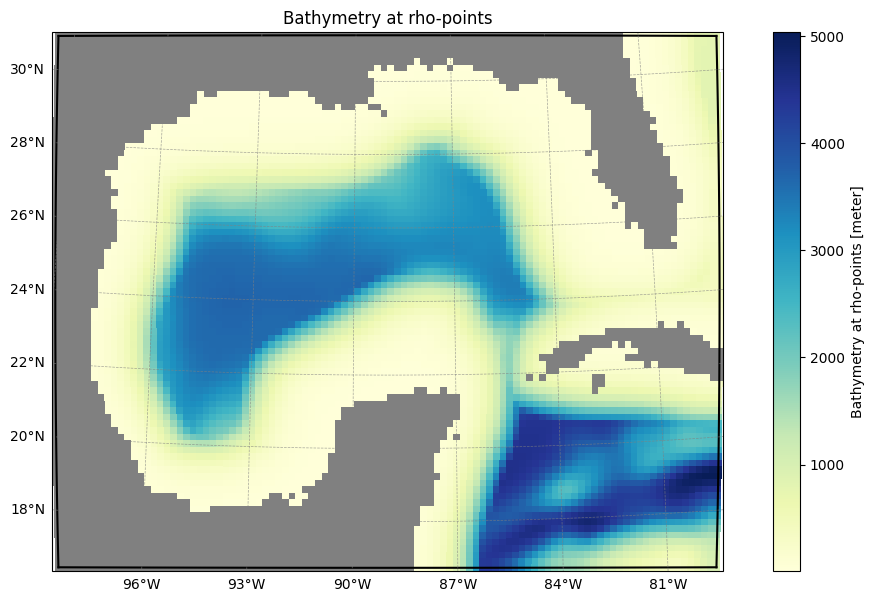

In [8]:
grid.plot()

Once we are happy with our grid, we can save it as a netCDF file via the `.save` method:

In [9]:
grid.save(target_dir / "roms_grd.nc")

2025-09-23 14:11:55 - INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_grd.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_grd.nc')]

We can also export the grid parameters to a YAML file. This gives us a more storage-effective way to save and share input data made with `ROMS-Tools`. The YAML file can be used to recreate the same object later.

In [10]:
yaml_filepath = target_dir / "roms_grd.yaml"
grid.to_yaml(yaml_filepath)

You can find more information about creating, plotting, and saving grids [here](https://roms-tools.readthedocs.io/en/latest/grid.html).

### Initial Conditions

Here, we want to prepare a simulation in which we run ROMS with MARBL biogeochemistry (BGC), so we need to prepare both physical and BGC initial conditions. We create physical and BGC initial conditions **together** because ROMS needs a **single** initial conditions file. We use

* **GLORYS data** to create our physical initial conditions, i.e., temperature, salinity, sea surface height, and velocities
* a **unified biogeochemical (BGC) climatology** combining multiple observationally and model based sources to create our BGC initial conditions

[Here](https://roms-tools.readthedocs.io/en/latest/datasets.html) you can find instruction on how to download these datasets. We have already completed these steps, and the datasets are locally available under:

In [11]:
glorys_path = "copernicus-data/global_GLORYS_Jan2012.nc"

In [12]:
unified_bgc_path = "BGC-data/BGCdataset.nc"

With the source data in place, we can now generate the initial conditions.

In [13]:
from roms_tools import InitialConditions

In [14]:
%%time
initial_conditions = InitialConditions(
    grid=grid,
    ini_time=start_time,
    source={"name": "GLORYS", "path": glorys_path},
    bgc_source={
        "name": "UNIFIED",
        "path": unified_bgc_path,
        "climatology": True,
    },
    use_dask=True
)

2025-09-23 14:19:28 - INFO - Sea surface height will NOT be used to adjust depth coordinates.
2025-09-23 14:19:28 - INFO - Selected time entry closest to the specified start_time (2012-01-01 00:00:00) within the range [2012-01-01 00:00:00, 2012-01-02 00:00:00]: ['2012-01-01T00:00:00.000000000']
2025-09-23 14:19:28 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-09-23 14:19:32 - INFO - 2D horizontal fill is skipped because source data already contains filled values.


CPU times: user 2.98 s, sys: 1.49 s, total: 4.47 s
Wall time: 4.36 s


In [15]:
initial_conditions.ds

<xarray.Dataset> Size: 25MB
Dimensions:      (ocean_time: 1, s_rho: 20, eta_rho: 82, xi_rho: 102,
                  xi_u: 101, eta_v: 81, s_w: 21)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2012-01-01
  * ocean_time   (ocean_time) float64 8B 3.787e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 669kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 669kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 663kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 661kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    zeta         (ocean_time, eta_rho, xi_rho) float32 33kB 0.2544 ... 0.2846
    ubar         (ocean_time, eta_rho, xi_u) float32 33kB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...           ...
    Lig          (ocean_time, s_rho, eta_rho, xi_rho) float32 669kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    DIC_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 669kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    ALK_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 669kB dask.array<chunksize=(1, 20, 50, 50), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 703kB 0.0 ... 0.0
    Cs_r         (s_rho) float32 80B -0.9579 -0.8615 ... -0.002245 -0.0002471
    Cs_w         (s_w) float32 84B -1.0 -0.9114 -0.809 ... -0.0009921 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   2.6.1.dev78+g08035d0f0.d20250828
    ini_time:                             2012-01-01 00:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    bgc_source:                           UNIFIED
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

Here is a plot of the uppermost layer of the temperature field.

[########################################] | 100% Completed | 3.47 sms


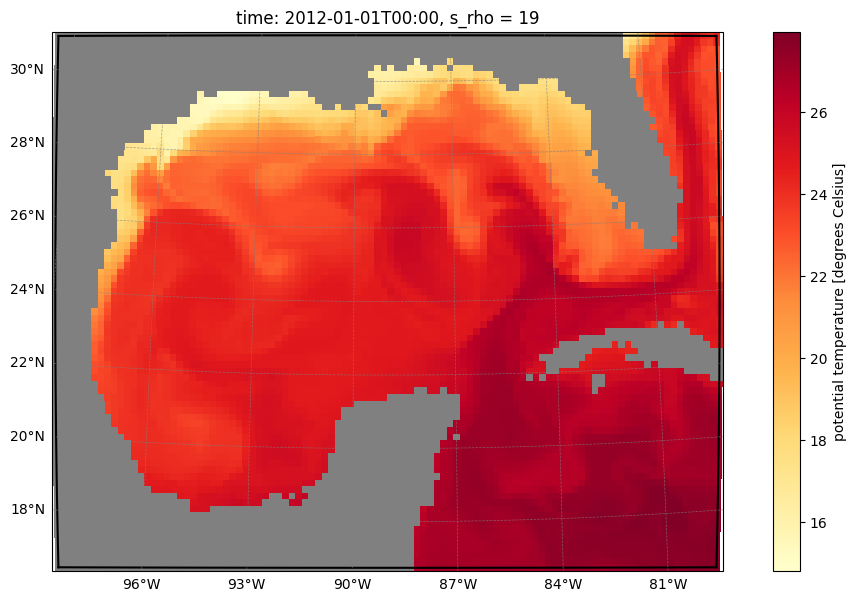

In [17]:
initial_conditions.plot("temp", s=-1)

We can also plot vertical sections of our initial conditions, for example alkalinity.

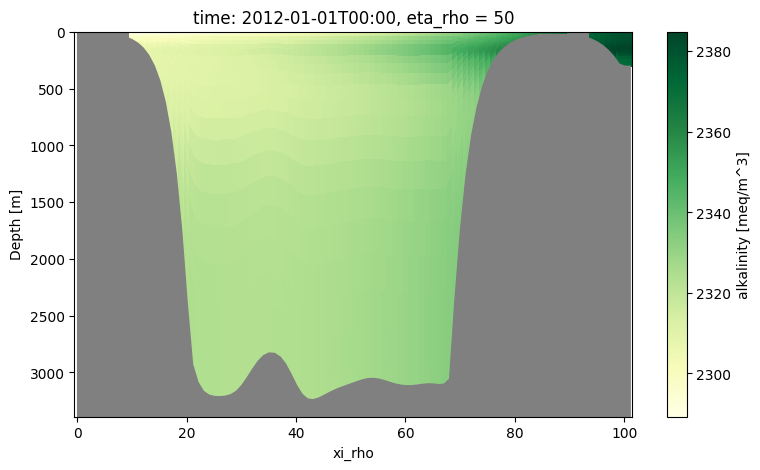

In [18]:
initial_conditions.plot("ALK", eta=50)

We can now save the dataset as a NetCDF and YAML file.

In [19]:
initial_conditions.save(target_dir / "roms_ini.nc")

2025-09-23 14:20:44 - INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_ini.nc


[########################################] | 100% Completed | 20.07 ss


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_ini.nc')]

In [20]:
initial_conditions.to_yaml(target_dir / "roms_ini.yaml")

You can find more information about creating, plotting, and saving initial conditions [here](https://roms-tools.readthedocs.io/en/latest/initial_conditions.html).

### Surface Forcing
Next, we create the surface forcing for our domain.

In [17]:
from roms_tools import SurfaceForcing

`ROMS-Tools` can create two types of surface forcing:

* **physical surface forcing** like 10m wind, shortwave radiation, and air temperature at 2m
* **biogeochemical (BGC) surface forcing** like atmospheric pCO2

Unlike initial conditions data, ROMS can read multiple surface forcing files, so we create these two types separately.

#### Physical Surface Forcing

In this subsection, we use ERA5 data to create our physical surface forcing. ROMS-Tools can stream the ERA5 data directly from the cloud, so you don't need to (but you can) pre-download the ERA5 source data (as the case for GLORYS). Read more about source data options here.

In [18]:
%%time
surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "ERA5"},
    correct_radiation=True, 
    type="physics",
    use_dask=True
)

INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
INFO - Data will be interpolated onto fine grid.
INFO - Applying 2D horizontal fill to the source data before regridding.
INFO - Applying 2D horizontal fill to the source data before regridding.


CPU times: user 3min 2s, sys: 9.76 s, total: 3min 12s
Wall time: 1min 45s


In [16]:
surface_forcing.ds

NameError: name 'surface_forcing' is not defined

Here is a plot of the zonal wind at the first created time stamp.

[########################################] | 100% Completed | 104.28 ms


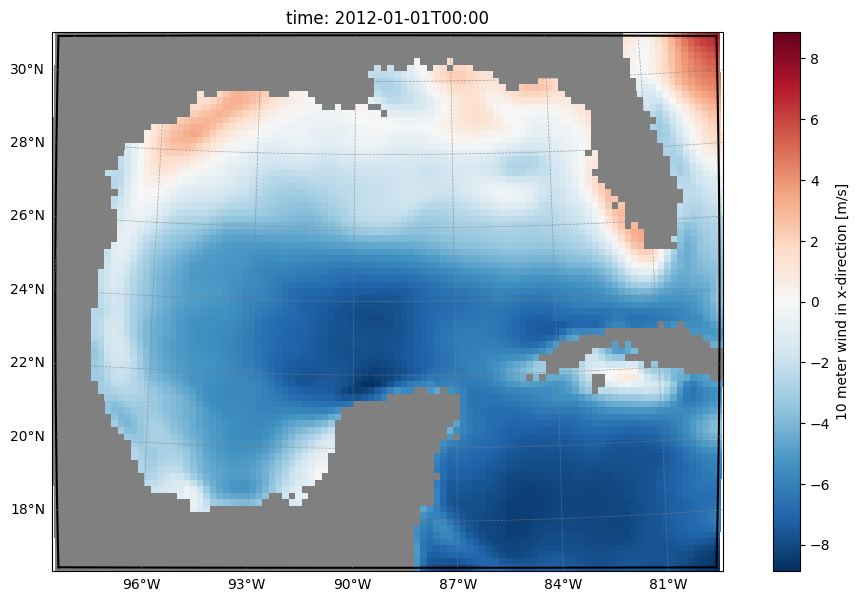

In [19]:
surface_forcing.plot("uwnd", time=0)

Let's save our physical surface forcing to NetCDF and YAML files.

In [20]:
surface_forcing.save(target_dir / "roms_frc.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_frc_201201.nc


[########################################] | 100% Completed | 114.13 s


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_frc_201201.nc')]

In [21]:
surface_forcing.to_yaml(target_dir / "roms_frc.yaml")

#### Biogeochemical (BGC) Surface Forcing
We now create BGC surface forcing. The BGC variables are interpolated from a **unified BGC climatology**, which integrates observationally and model based sources. 

The BGC dataset is located here:

In [22]:
unified_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/UNIFIED/BGCdataset.nc"

In [23]:
%%time

bgc_surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc",
)

INFO - Data will be interpolated onto grid coarsened by factor 2.
INFO - 2D horizontal fill is skipped because source data already contains filled values.


CPU times: user 71.6 ms, sys: 4.01 ms, total: 75.6 ms
Wall time: 314 ms


We can plot the BGC surface forcing as we saw above.

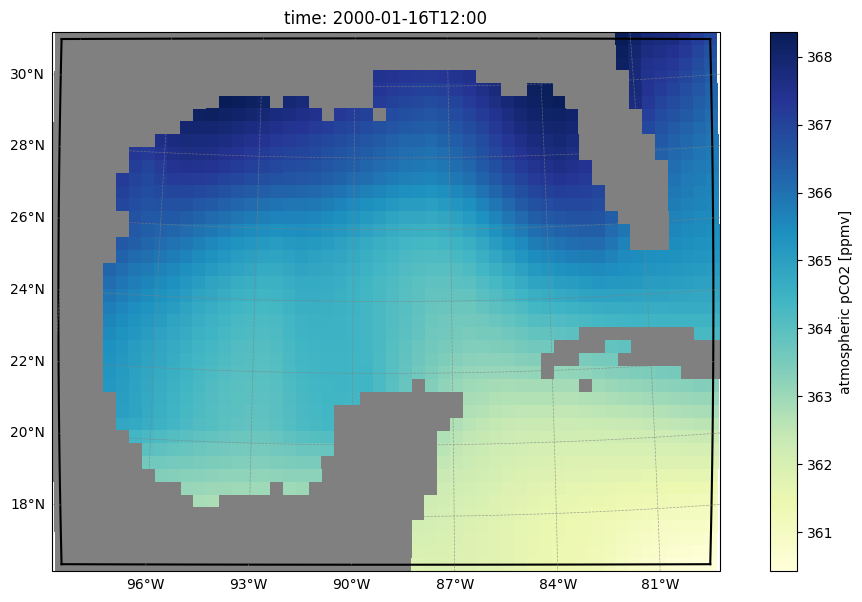

In [24]:
bgc_surface_forcing.plot("pco2_air", time=0)

Finally, we save our BGC surface forcing to NetCDF and YAML files.

In [25]:
bgc_surface_forcing.save(target_dir /"roms_frc_bgc.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_frc_bgc_clim.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_frc_bgc_clim.nc')]

In [26]:
bgc_surface_forcing.to_yaml(target_dir / "roms_frc_bgc.yaml")

You can find more information about creating, plotting, and saving surface forcing [here](https://roms-tools.readthedocs.io/en/latest/surface_forcing.html).

### Boundary Forcing
Next, we create the boundary forcing, or, equivalently, the open boundary conditions.

In [27]:
from roms_tools import BoundaryForcing

`ROMS-Tools` can create two types of boundary forcing:

* **physical boundary forcing** like temperature, salinity, velocities, and sea surface height
* **biogeochemical (BGC) boundary forcing** like alkalinity, dissolved inorganic phosphate, etc.

As with surface forcing, ROMS accepts multiple boundary forcing files, so we create these two types separately.

#### Physical boundary forcing

We use the same GLORYS data as above to create our physical boundary forcing.

In [28]:
%%time

boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "GLORYS", "path": glorys_path},
    type="physics"
)

INFO - Sea surface height will NOT be used to adjust depth coordinates.
INFO - Applying 1D horizontal fill to southern boundary.
WARNING - For u, the southern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
WARNING - For v, the southern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
WARNING - For temp, the southern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
WARNING - For zeta, the southern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
INFO - Applying 1D horizontal fill to eastern boundary.
WARNING - For u, the eastern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
WARNING - For v, the eastern boundary is divided by land. It would be safer (but slower) to use `apply_2d_horizontal_fill = True`.
WARNING - For temp,

CPU times: user 11 s, sys: 929 ms, total: 11.9 s
Wall time: 1min 55s


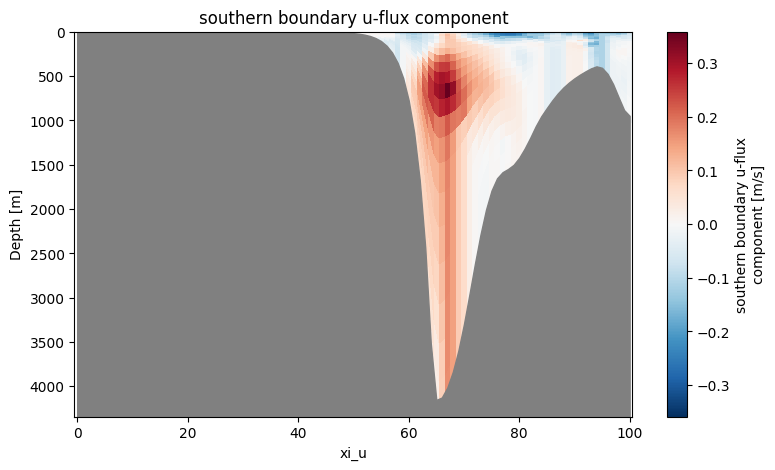

In [29]:
boundary_forcing.plot("u_south", time=0)

In [30]:
boundary_forcing.save(target_dir / "roms_bry.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_bry_201201.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_bry_201201.nc')]

In [31]:
boundary_forcing.to_yaml(target_dir / "roms_bry.yaml")

#### Biogeochemical (BGC) boundary forcing
We now create BGC boundary forcing. The BGC variables are interpolated from the same unified BGC climatology as above.

In [32]:
%%time

bgc_boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc"
)

INFO - Sea surface height will NOT be used to adjust depth coordinates.


CPU times: user 3.68 s, sys: 665 ms, total: 4.35 s
Wall time: 53.3 s


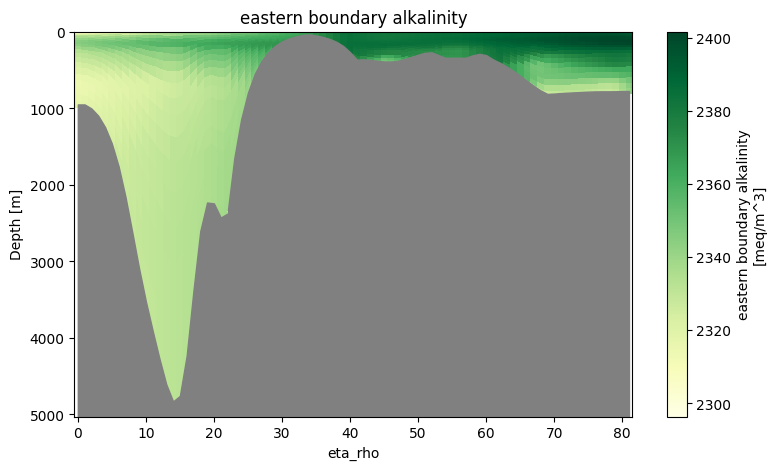

In [33]:
bgc_boundary_forcing.plot("ALK_east", time=0)

In [34]:
bgc_boundary_forcing.save(target_dir / "roms_bry_bgc.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_bry_bgc_clim.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_bry_bgc_clim.nc')]

In [35]:
bgc_boundary_forcing.to_yaml(target_dir / "roms_bry_bgc.yaml")

You can find more information about creating, plotting, and saving boundary forcing [here](https://roms-tools.readthedocs.io/en/latest/boundary_forcing.html).

### River Forcing
Next, we create the river forcing.

In [36]:
from roms_tools import RiverForcing

In [37]:
%time
river_forcing = RiverForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
)

CPU times: user 16 μs, sys: 0 ns, total: 16 μs
Wall time: 30.3 μs


INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
INFO - Compute climatology for river forcing.
WARNING - NaN values detected in the 'river_volume' field. These values are being set to zero. This may indicate missing river data, which could affect model accuracy. Consider setting `convert_to_climatology = 'if_any_missing'` to automatically fill missing values with climatological data.


In [38]:
%time
river_forcing = RiverForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    include_bgc=True
)

CPU times: user 11 μs, sys: 0 ns, total: 11 μs
Wall time: 21 μs


INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
INFO - Compute climatology for river forcing.
WARNING - NaN values detected in the 'river_volume' field. These values are being set to zero. This may indicate missing river data, which could affect model accuracy. Consider setting `convert_to_climatology = 'if_any_missing'` to automatically fill missing values with climatological data.


WARNING - Only the first 20 rivers will be plotted (received 34).


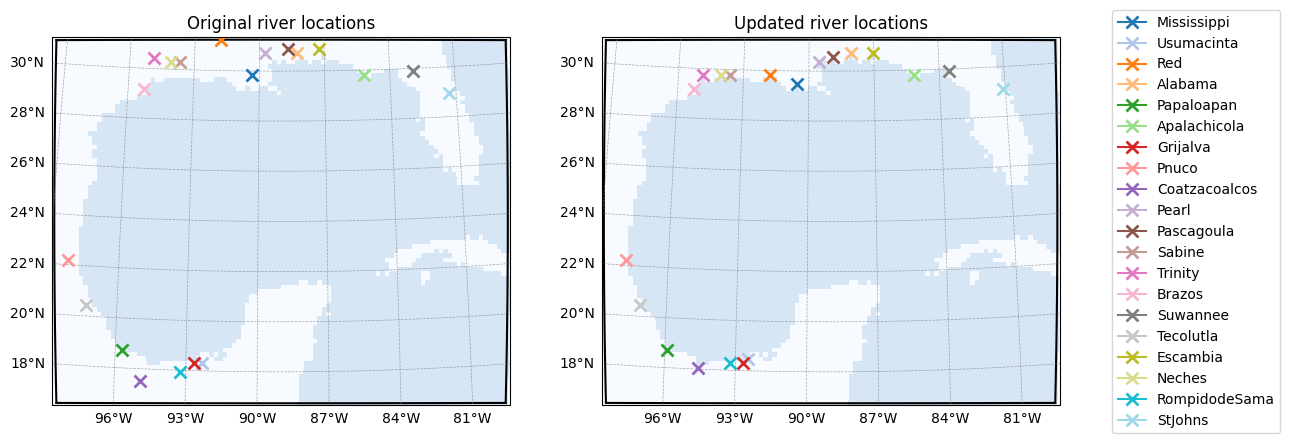

In [39]:
river_forcing.plot_locations()

WARNING - Only the first 20 rivers will be plotted (received 34).


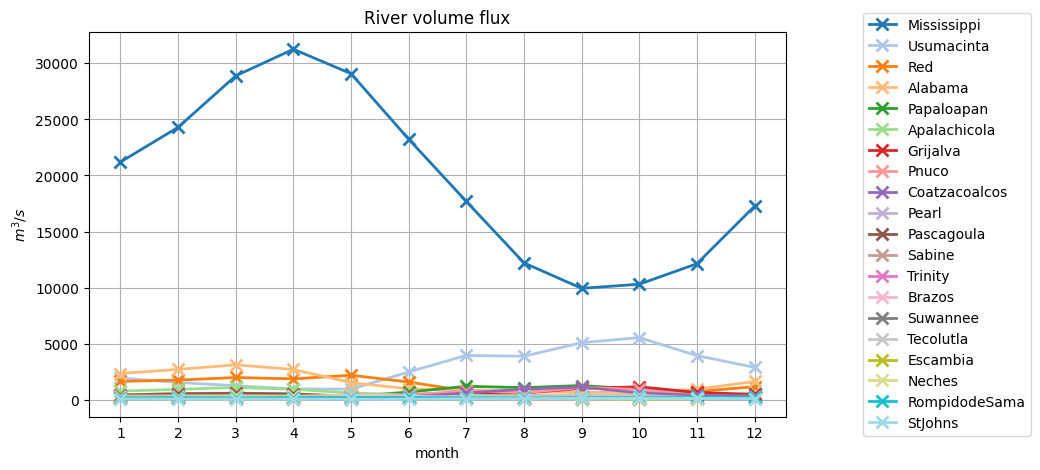

In [40]:
river_forcing.plot("river_volume")

In [41]:
river_forcing.save(target_dir / "roms_rivers.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_rivers.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_rivers.nc')]

In [42]:
river_forcing.to_yaml(target_dir / "roms_rivers.yaml")

### Carbon Dioxide Removal (CDR) Forcing

In [43]:
from roms_tools import TracerPerturbation, CDRForcing

In [44]:
release = TracerPerturbation(
    name="release1",
    lat=28,  # degree N
    lon=-96,  # degree E
    depth=0,  # m
    hsc=100000, # m
    vsc=50,  # m
    tracer_fluxes={"ALK": 2 * 10**6},  # meq/s
)

In [45]:
cdr_forcing = CDRForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    releases=[release]
)

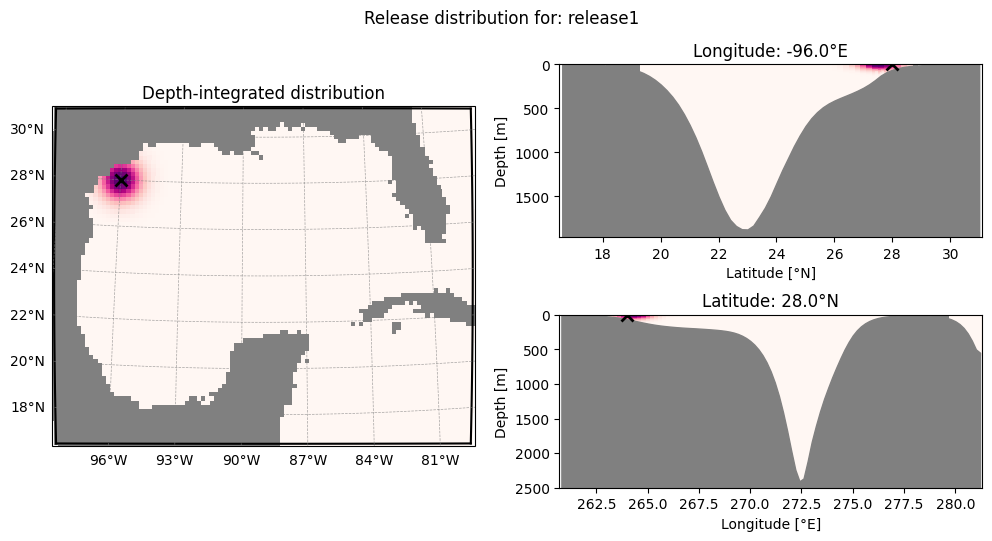

In [46]:
cdr_forcing.plot_distribution(release_name="release1")

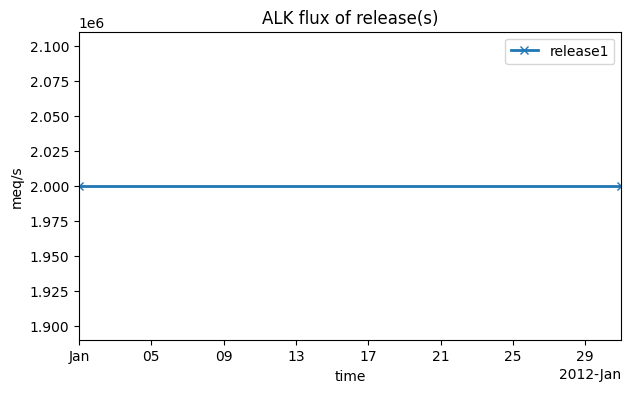

In [47]:
cdr_forcing.plot_tracer_flux(tracer_name="ALK")

In [48]:
cdr_forcing.save(target_dir / "roms_cdr.nc")

INFO - Writing the following NetCDF files:
ROMS_TOOLS_INPUT_DATA/roms_cdr.nc


[PosixPath('ROMS_TOOLS_INPUT_DATA/roms_cdr.nc')]

In [49]:
cdr_forcing.to_yaml(target_dir / "roms_cdr.yaml")

## Running ROMS
We can run a pre-compiled version of ROMS with our input datasets using a container. You will need `podman` (available through `conda`) or `docker`. These tools can be used to run programs in portable, reproducible pre-configured environments. We have built a [container for this example](https://github.com/orgs/CWorthy-ocean/packages/container/package/roms_tools_end_to_end_example) that is available through the GitHub Container Repository.

Users on MacOS must first initialise a virtual machine:

In [5]:
%%bash
podman machine init --cpus 10
podman machine start

Looking up Podman Machine image at quay.io/podman/machine-os:5.4 to create VM


Getting image source signatures
Copying blob sha256:49c3b3279cd1ac106e37700a5763f4ff6302d1153745b40d8cc14750f862afce
Copying config sha256:44136fa355b3678a1146ad16f7e8649e94fb4fc21fe77e8310c060f61caaff8a
Writing manifest to image destination


49c3b3279cd1ac106e37700a5763f4ff6302d1153745b40d8cc14750f862afce
Machine init complete
To start your machine run:

	podman machine start

Starting machine "podman-machine-default"

This machine is currently configured in rootless mode. If your containers
require root permissions (e.g. ports < 1024), or if you run into compatibility
issues with non-podman clients, you can switch using the following command:

	podman machine set --rootful

API forwarding listening on: /var/folders/1s/xjsjyqrj2rdft8014664qczc0000gn/T/podman/podman-machine-default-api.sock

The system helper service is not installed; the default Docker API socket
address can't be used by podman. If you would like to install it, run the following commands:

        sudo /opt/homebrew/Cellar/podman/5.4.1/bin/podman-mac-helper install
        podman machine stop; podman machine start

You can still connect Docker API clients by setting DOCKER_HOST using the
following command in your terminal session:

        export DOCKER_HO

Next we can pull and run the container. We need to mount the directory in which we created our input files inside the container so the model can access these files. We also need a directory to hold the model output, which we will also mount inside the container.

In [19]:
%%bash
mkdir output #Create the model output directory
podman pull ghcr.io/cworthy-ocean/roms_tools_end_to_end_example:latest # Pull the image
# Run the container, removing it on completion (--rm), and mounting the input and output volumes (-v):
podman run --rm -v ./ROMS_TOOLS_INPUT_DATA:/input -v ./output:/output ghcr.io/cworthy-ocean/roms_tools_end_to_end_example:latest 

mkdir: output: File exists
Trying to pull ghcr.io/cworthy-ocean/roms_tools_end_to_end_example:latest...
Getting image source signatures
Copying blob sha256:4f4fb700ef54461cfa02571ae0db9a0dc1e0cdb5577484a6d75e68dc38e8acc1
Copying blob sha256:0ff53ee6eb9f4dcfb3c27976e37e51bf5d46b0bd62eb39cb94fa4819e11dbd63
Copying blob sha256:489ce25c545cd84af4e21926af62d75a2d26048de532f2b5f514d2929117dbf6
Copying blob sha256:70536079cef54b46425374e8c3ec50e74327d37f6b3075bd1276a1ae98670ffa
Copying blob sha256:4f4fb700ef54461cfa02571ae0db9a0dc1e0cdb5577484a6d75e68dc38e8acc1
Copying blob sha256:05003c3dcd1a935798037e563183f2a84e397f0735a2dcd015bdfd00aa657b76
Copying blob sha256:46f4afb40dbdb0279041dfffacc4eb59b6e5ab004b2538445eaca1cad0422a9e
Copying blob sha256:4f4fb700ef54461cfa02571ae0db9a0dc1e0cdb5577484a6d75e68dc38e8acc1
Copying blob sha256:9333b9f94436bff03e9bdece7420daed6c20c0272d58ffa4fd3c072e58c250fe
Copying blob sha256:e4a631c73444d8748301d06d0684d46f6e9b3f98b62d66ffdcdb1a44acfb55cf
Copying blob s

e1e48ea370495b34b1f92f8151df0dd849acaff898b842275443ec56bbe77a45


'/input' -> './ROMS_TOOLS_INPUT_DATA'
'/input/roms_rivers.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_rivers.nc'
'/input/roms_rivers.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_rivers.yaml'
'/input/roms_bry.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_bry.yaml'
'/input/roms_bry_201201.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_bry_201201.nc'
'/input/roms_bry_bgc.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_bry_bgc.yaml'
'/input/roms_bry_bgc_clim.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_bry_bgc_clim.nc'
'/input/roms_cdr.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_cdr.nc'
'/input/roms_cdr.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_cdr.yaml'
'/input/roms_frc.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_frc.yaml'
'/input/roms_frc_201201.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_frc_201201.nc'
'/input/roms_frc_bgc.yaml' -> './ROMS_TOOLS_INPUT_DATA/roms_frc_bgc.yaml'
'/input/roms_frc_bgc_clim.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_frc_bgc_clim.nc'
'/input/roms_grd.nc' -> './ROMS_TOOLS_INPUT_DATA/roms_grd.nc'
'/input/roms_grd.yaml' -> './ROMS_TOOLS_

## Viewing the output
The output is in the `output` directory we created. We can visualize it with `roms-tools`:


In [22]:
ls output/

ROMS_example_cstar.20120102000000.nc  ROMS_example_his.20120101000000.nc


[########################################] | 100% Completed | 105.89 ms


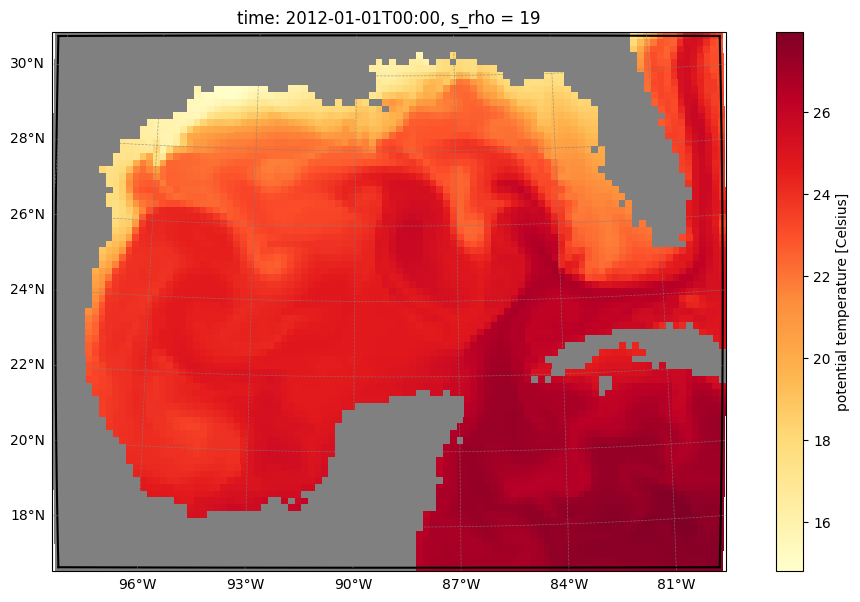

In [26]:
from roms_tools import ROMSOutput
roms_output = ROMSOutput(
    grid=grid,
    path="output/ROMS_example_his.20120101000000.nc",
    use_dask=True,
)
roms_output.plot("temp", time=0, s=-1)